<h1><strong><center>Mastering Machine Learning Foundations with Linear Regression</center></strong></h1>

<h1>1. Introduction</h1>

Machine Learning use cases can be classified in two main groups:

* <strong>Regression</strong>: the output of the model in this case is numerical and the goal is to find the relationship between the input variables and the output variables. Regression models can be simple, such as linear regression, or more complex, such as polynomial regression. Examples of regression models can be the prediction of the value of a house, the temperature of a city or the price of a stock.

* <strong>Classification</strong>: you've already done it!. Classfication models are used to predict discrete values, such as whether an email is spam or not or whether a customer is likely to buy a product or not. In a classification model, the output variable is categorical and the goal is to find the relationship between the input variables and the output variable. We can divide classification models in three subgroups
    - Binary classification: the model predicts if the sample belongs to one of two mutually exclusive classes. For example, given a tomography, if there's cancer or not.
    - Multi-class classification: the model predicts if the sample belongs to one of more than 2 mutually exclusive classess.
    - Multi-label classification: the model predicts if the sample belongs to one or more classess at once.
    
Therefore, regression models are used to predict continuous values, while classification models are used to predict categorical values.

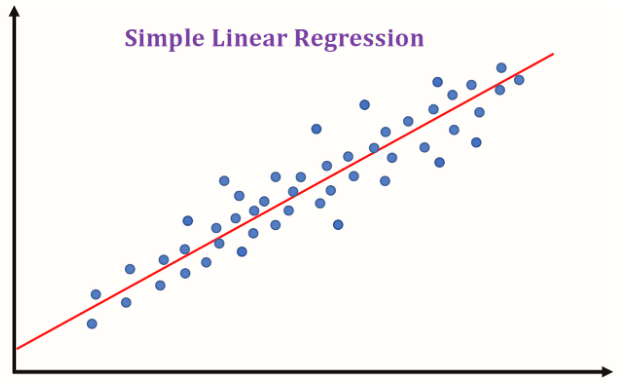

<h1>2. Building Linear Regression from scratch</h1>

In this notebook we're going to build a Linear Regression model from scratch. We won't use any tool provided by Pytorch in order to set up the stages we used in the Outfit Classifier model

So guys, it's time to say that Machine Learning has to do with Linear Algebra and Calculus. Yes, math is the key in every single foundation of Machine Learning.
If you manage to finish this notebook, you will have opened the blackbox door of any Machine Learning model...
Let's start off with the magic.

<h2>Importing modules</h2>


As usual, let's import the modules we're going to use in this drill

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
from IPython.display import display, HTML

display(HTML("<style>.output { display: flex; justify-content: center; }</style>"))

<h2>Building the dataset</h2>

Say we have a set of observations our experimental group has just sent us. Array x represents the inputs and array y shows the outputs

In [3]:
# Inputs observerd
x = [-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5]
# Outputs observerd
y = [2.292810956,2.669656316,2.176859694,2.761872736,2.64112637,2.546430827,2.895934924,3.455978572,3.003456113,3.066457256,3.291001933,3.601666326,3.833641047,3.900596414,3.613502837,4.331765413,3.963925711,3.971332485,4.296742522,4.714925133,4.65354761,4.960615192,5.424617958,5.079345736,5.860704627,5.582586609,6.171985028,5.503825528,6.214933558,6.292708962,5.763454252,6.776152515,6.969193357,7.00409557,6.450674523,6.662626481,6.798758237,7.406862568,7.05617933,7.843912093]

Let's draw a plot with the observed data. Matplotlib is the most used library in Machine Learning community. It provides a wide variety of plotting tools for creating 2D and 3D visualizations, including line plots, scatter plots, bar charts, histograms, pie charts, and more.

Matplotlib is designed to work seamlessly with NumPy arrays, making it easy to plot data directly from arrays or to manipulate arrays for use in plotting. It also provides a wide range of customization options for fine-tuning the appearance of plots, including the ability to change colors, line styles, markers, and labels.

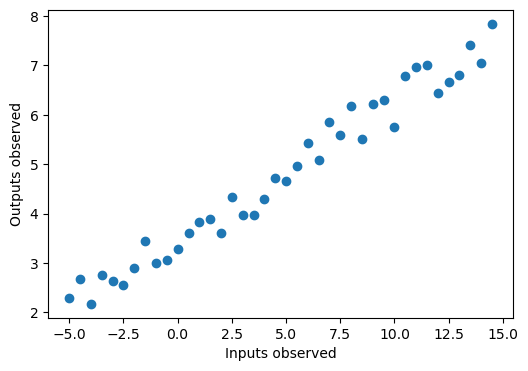

In [4]:
# Drawing a plot with the data

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Inputs observed', fontsize=10)
ax.set_ylabel('Outputs observed', fontsize=10)
ax.plot(x,y,'o')

Uhm, it seems to me that the data sent by the experimental group can be fitted with a linear regression. Let's start coding our Machine Learning model from scratch

<h2>3. Machine Learning model blocks</h2>

Let's review the main blocks every single model has:
* <strong>forward pass</strong>: in this step we plug in a batch of our training data and get the output. Then we compare the result of our model and the actual data.
* <strong>backward pass</strong>: this step deals with the math neccesary to make the optimization work. 
* <strong>optimization</strong>: here we modify the weights and bias of our model in order to approach our results to the actual data and, therefore, minimize the loss
* <strong>repetition</strong>: we repeat the algorithm as many times as the number of epochs defines.

These four steps are called the <strong>Learning Process</strong>. Next picture shows a brief description

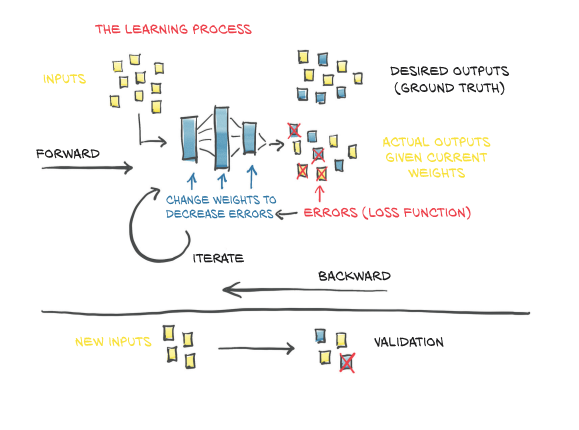

<h3> Forward pass</h3>

Since we've selected a linear regression as the model, we have to code the corresponding formula. Just to remind you the equation that fits a line

$$
\Large
\underbrace{y}_{output} = \overbrace{w}^{weight}\cdot\underbrace{x}_{input} + \overbrace{b}^{bias}
$$

We've used the Machine Learning terminolgy for the components of thel linear regression. Maybe you remember the "weight" as "slope" and the "bias" as "y-intercept".
Sorry for this change, you'll find "Weight" and "Bias" instead of "slope" and "y-intercept" in any Machine Learning paper

<strong>Exercise 1</strong> Write a function that receives the input, the weight w, and the bias b as arguments and returns an output y

In [7]:
### Your code starts here ###



### Your code ends here ###

We have some inputs and some outputs, and we want to estimate w and b in order to fit our data. This work will be done by the Machine Learning box we're building.


<h3> Loss function</h3>

Our optimization process aims at finding 𝐰 and 𝐛 so that the loss function is at a minimum. 
But, what is a loss function?
The <strong>Loss Function</strong> describes the difference between the set of values predicted by our model $\hat{y}$ or y_hat and the set o values observed as outputs (y).
Just to remark it, the following terms are widely used to speak about observed values and predicted values:
* y : we call it observation, label or ground truth
* $\hat{y}$: we call it the predicted value


In regression models, a commonly used loss function is the Mean Squared Error or (MSE). MSE is just the mean of the differences between predicted values and the ground truths squared
$$
\Large 
L(y)=\frac{(\hat{y}-y)^2}{n}
$$

<strong>Exercise 2</strong> Write a function that receives the predicted value y_hat and the label as arguments and returns the MSE

In [8]:
### Your code starts here ###


##Your code ends here ###

<h3> Dealing with the Gradient</h3>

We now have our main target: <strong>to find the set of (w,b) that minimizes the Loss Function</strong> we've written in the cell shown above

To achieve the minimum we use a power calculus tool called the gradient. Let's remember what the gradient is.
In calculus, the gradient refers to the rate of change of a function with respect to its input variables. 
More specifically, the gradient of a function is a vector that points in the direction of the greatest increase of the function, and its magnitude represents the steepness of the function in that direction.<br>
The gradient is often denoted by the symbol "∇" (nabla) and is defined as a vector of partial derivatives of the function with respect to each input variable.<br>For example, if we have a function L(w, b), the gradient of L is given by: <br><strong>

$$
\Large
∇L = [\frac{∂L}{∂w}, \frac{∂L}{∂b}]
$$

As you can see in the equation, we are differentiating the Loss function with respect to the the weight and the bias. These two parameters are not directly present in the Loss equation. <br>Then, we must introduce the last calculus tool we need to build our machine learning model. This tool is called the<strong> Chain Rule<strong>.

The next slide gives a summary of the three calculus tools needed to deal with the gradient.<br>

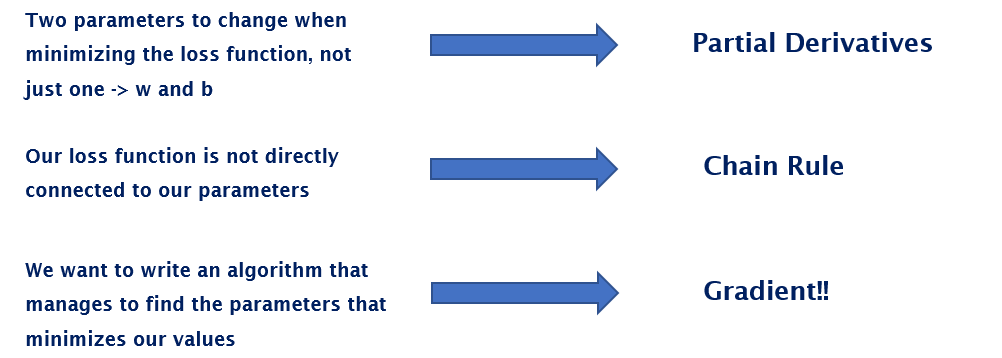


We can now write the gradient of the loss function with respect to the parameters we want to optimize: the weight and the bias. <br> The gradient is a <strong>vector</strong> with two components described below:


$$
\Large
∇L(w,b) = [\frac{∂L(\hat{y})}{∂w}, \frac{∂L(\hat{y})}{∂b}] =  [\frac{∂L(\hat{y})}{∂\hat{y}}\cdot\frac{∂\hat{y}}{∂w}, \frac{∂L(\hat{y})}{∂\hat{y}}\cdot\frac{∂\hat{y}}{∂b}]
$$

Next slide shows the calculation of the first component of the Gradient (the derivate of the Loss function with respect to the weight). As you can check out, we have used the chain rule.


$$
\Large
\frac{\partial L(\hat{y})}{\partial w} = \left(\frac{\partial L(\hat{y})}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w}\right) = \left\{
    \begin{array}{l}
        \frac{\partial L(\hat{y})}{\partial \hat{y}} = \frac{\partial (\hat{y}-y)^2}{\partial \hat{y}} = \frac{\partial (\hat{y}^2-2y\hat{y}+y^2)}{\partial \hat{y}} = 2\hat{y}-2y = 2(\hat{y}-y) \\
        \frac{\partial \hat{y}}{\partial w} = \frac{\partial (w \cdot x+b)}{\partial w} = \frac{\partial (w \cdot x)}{\partial w}+\frac{\partial b}{\partial w} = x \\   
    \end{array}
\right.\!
$$

We've succesfully calculated both terms needed to apply the chain rule. Let's note down the final result:


$$
\Large
\frac{∂L(\hat{y})}{∂w} = (\frac{∂L(\hat{y})}{∂\hat{y}} \cdot \frac{∂L(\hat{y})}{∂w}) = 2(\hat{y}-y) \cdot x
$$

<strong>Exercise 3</strong> Write two functions:
* First function dloss_fn and: given the predicted value and the ground truth as arguments, returns the ∂L/∂$\hat{y}$
* Second function dmodel_dw: given the input, the weight and the bias, returns the ∂$\hat{y}$/∂w

In [9]:
def dloss_fn(y_hat, y):
    
    ### Your code starts here
    
    ### Your code ends here
    
def dmodel_dw(x, w, b):
    
    ### Your code starts here ###
    
    ### Your code ends here ###

Next slide shows the calculation of the second component of the Gradient (the derivate of the Loss function with respect to the bias). As you can check out, we have used the chain rule.


$$
\Large
\frac{\partial L(\hat{y})}{\partial b} = \left(\frac{\partial L(\hat{y})}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b}\right) = \left\{
    \begin{array}{l}
        \frac{\partial L(\hat{y})}{\partial \hat{y}} = \frac{\partial (\hat{y}-y)^2}{\partial \hat{y}} = \frac{\partial (\hat{y}^2-2y\hat{y}+y^2)}{\partial \hat{y}} = 2\hat{y}-2y = 2(\hat{y}-y) \\
        \frac{\partial \hat{y}}{\partial b} = \frac{\partial (w \cdot x+b)}{\partial b} = \frac{\partial (w \cdot x)+\partial b}{\partial b} = 1 \\
    \end{array}
\right.
$$

Let's put together these two terms. We'll get the final formula of the second component of our gradient vector


$$
\Large
\frac{∂L(\hat{y})}{∂b} = \frac{∂L(\hat{y})}{∂\hat{y}} \cdot \frac{∂L(\hat{y})}{∂b} = 2(\hat{y}-y)
$$

<strong>Exercise 4</strong>: Write one function:
    
* dmodel_db: given the input, the weight and the bias, returns the ∂$\hat{y}$/∂b

In [10]:
def dmodel_db(x, w, b):
    
    ### Your code starts here
    
    ### Your code ends here


Don't forget that we're dealing with a set of samples and we'll calculate the gradient based on it. <br>Therefore, given N samples, we'll calculate the gradient as the <strong>mean</strong> of the gradient of all samples.<br>
Next formula converts the gradient calculated for a given sample into a mean of gradients of our N samples.


$$
\Large
∇L = [\frac{\sum_{k=1}^N{[(\hat{y}_k - y_k) \cdot x_k]}}{N},\frac{\sum_{k=1}^N{(\hat{y}_k - y_k) }}{N}]
$$

You're ready to write the function that calculates the gradient. Let us write the code for you

In [11]:
def grad_fn(x, y, y_hat, w, b):
    
    # Remember, you can use the chain rule to code the gradient
    dloss_dtp = dloss_fn(y_hat, y)
    dloss_dw = dloss_dtp * dmodel_dw(x, w, b)
    dloss_db = dloss_dtp * dmodel_db(x, w, b)

    return torch.stack([dloss_dw.sum()/ y_hat.size(0), dloss_db.sum()/ y_hat.size(0)])


<h3> Using the gradient to minimize the loss function</h3>

The last tool we need to make our model run is the algorithm that uses the gradient to look for the minimum of the loss function. <br>
Multi-variable function 𝑓(𝒛) is defined and differentiable in a neighborhood of a point 𝒛: <br><br><strong><center>then 𝑓(𝒛) decreases fastest if one goes from 𝒛 in the direction of the negative gradient of 𝑓 at 𝒛, −∇𝑓(𝒛).</center></strong>


Given a value $𝒛_0$ it follows that, for a small $\gamma∈ℝ^+$, we perform the update:


$$
\Large
z_1 = z_ 0- \gamma \nabla f(z_0)
$$  

Executing multiple times the given formula, obtained z values will approach the minimum of the function. We call this algorithm the <strong>Gradient Descent</strong> algorithm.

In the equation shown above, 𝛾 represents the size of the step we want to walk looking for the minimum of the loss function. In the Machine Learning community, 𝛾 is called the <strong>learning rate</strong>.

<h2>4. The training loop</h2>

It't time to put all the blocks together and build the training loop, you'll fill up some pieces of the code needed to make it work


<strong>Exercise 5</strong>: Fill up the different blocks to make the model run. Don't forget to use the functions coded above

In [12]:
def training_loop(n_epochs, learning_rate, params, x, y, print_params=True):

    losses = []
    for epoch in range(1, n_epochs + 1):

        # Params we want to fit
        w, b = params

        # Setting the model we will use (a simple linear equation)
        
        ### Your code starts here ###
        
        
        ### Your code ends here ###
        
        
        # Setting our gradient vector
        
        ### Your code starts here ###
        
        
        ### Your code ends here ###

        
        # Setting our Gradient Descent step
        
        ### Your code starts here ###
        
        
        ### Your code ends here ###

        
        ### Calculate the loss obtained ###
        
        ### Your code starts here ###
        
        
        ### Your code ends here ###
        
        losses.append(loss)

        # Showing the loss obtained at different epochs
        if epoch in {1, 2, 3, 10, 11, 99, 100, 1000, 4000, 5000, 10000, 50000, 70000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', gradient_vector)
                print('    Loss:  ', loss)
        if epoch in {4, 12, 101}:
            print('...')

        # Stopping the code if loss tends to infinite
        # if not torch.isfinite(loss).all():
        #    break 
            
            
    return params,losses

<h2> 5. Running the Machine Learning model</h2>

If you have reached this milestone, you deserve a praise! You've just built a Machine Learning model from scratch. Now let's run the training loop and check if it's working as expected

<strong>Exercise 6</strong>: Convert your observations from list to Pytorch tensors

In [13]:
### Your code starts here ###


### Your code ends here ###

<strong>Exercise 7</strong>: Complete the call to the training loop function

In [14]:
n_epochs = 10000

### Your code starts here ###


### Your code ends here ###

print("\nThe model, after {0:d} epochs gets the following parameters: \n weight= {1:.2f} \n bias = {2:.2f}".format(n_epochs,params[0].item(),params[1].item()))

Epoch 1, Loss 5.390935
    Params: tensor([0.5645, 0.5089])
    Grad:   tensor([ 4.3392, -3.1604])
    Loss:   tensor(5.3909)
Epoch 2, Loss 5.363051
    Params: tensor([0.5606, 0.5121])
    Grad:   tensor([ 3.8843, -3.1953])
    Loss:   tensor(5.3631)
Epoch 3, Loss 5.338489
    Params: tensor([0.5571, 0.5153])
    Grad:   tensor([ 3.4806, -3.2258])
    Loss:   tensor(5.3385)
...
Epoch 10, Loss 5.216069
    Params: tensor([0.5408, 0.5385])
    Grad:   tensor([ 1.6765, -3.3517])
    Loss:   tensor(5.2161)
Epoch 11, Loss 5.202140
    Params: tensor([0.5393, 0.5418])
    Grad:   tensor([ 1.5210, -3.3609])
    Loss:   tensor(5.2021)
...
Epoch 99, Loss 4.233574
    Params: tensor([0.5048, 0.8305])
    Grad:   tensor([ 0.2684, -3.1229])
    Loss:   tensor(4.2336)
Epoch 100, Loss 4.223756
    Params: tensor([0.5045, 0.8336])
    Grad:   tensor([ 0.2680, -3.1192])
    Loss:   tensor(4.2238)
...
Epoch 1000, Loss 0.574714
    Params: tensor([0.3562, 2.5591])
    Grad:   tensor([ 0.0923, -1.0742])

In [15]:
my_model = model(x, *params)

Let's plot our observations and the result of the model our machine has calculated. 

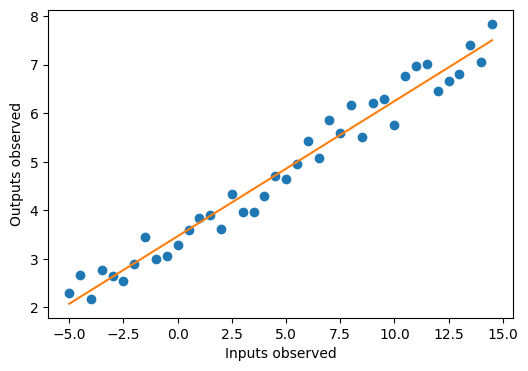

In [16]:
# Drawing a plot with the data

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('Inputs observed', fontsize=10)
ax.set_ylabel('Outputs observed', fontsize=10)
ax.plot(x,y,'o')
ax.plot(x, my_model.detach())

Ouh yeah! It seems that our machine has managed to find good enough weights and biases to fit the observations! We win!

We should also plot the computed loss in order to check if its values decrease.

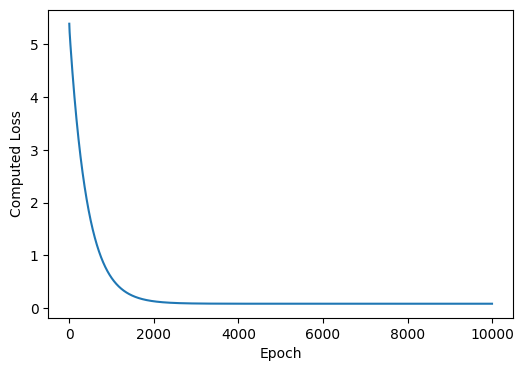

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.xlabel("Epoch")
plt.ylabel("Computed Loss")
ax.plot(losses)

<h2>6. Make your own prediction</h2>

You've managed to build a model that can make predictions following a linear regression model. It's time to use it!

<strong>Exercise 8</strong>: Figure out the output value for the input value 20 (for instance, if you wan to use another number as input, feel free!)

In [18]:
input_value = 20

### Your code starts here ###


### Your code ends here ###

print("The model predicts a value of {0:.2f} for the input {1:.2f}".format(float(input_value),prediction.item()))

The model predicts a value of 20.00 for the input 9.03
